# Project - Honey Bee Pollen Detection

### The aim of this project is to classify the images of the bees to detect whether they are carrying pollen grains or not. 

**Data Dictionary**

- This image dataset has been created from videos captured at the entrance of a bee colony in June 2017 at the Bee facility of the Gurabo Agricultural Experimental Station of the University of Puerto Rico.

- images/ contains images for pollen bearing and no pollen bearing honey bees.

- The prefix of the images names define their class: e.g. NP1268-15r.jpg for non-pollen and P7797-103r.jpg for pollen bearing bees. The numbers correspond to frame and item number respectively, you need to be careful that they are not numbered sequentially.

- pollen_data.csv - CSV file containing the image address and th true classification label


##  Importing libraries

In [1]:
import numpy as np
import pandas as pd
from pathlib import Path

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split

import tensorflow as tf

from sklearn.metrics import confusion_matrix, classification_report

## Importing dataset 

In [2]:
data = pd.read_csv(r'C:\Users\KIIT\Documents\LGM-Soc contributions\Honey bee Pollen Detection\Dataset/pollen_data.csv', usecols=['filename', 'pollen_carrying'])

In [3]:
data

,filename,pollen_carrying
0,P10057-125r.jpg,1
1,P57380-120r.jpg,1
2,NP63671-221r.jpg,0
3,NP53776-47r.jpg,0
4,NP13382-201r.jpg,0
...,...,...
709,NP64239-233r.jpg,0
710,NP10304-132r.jpg,0
711,NP28671-238r.jpg,0
712,P14163-218r.jpg,1


In [20]:
data.isnull().sum()

filename           0
pollen_carrying    0
dtype: int64

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 714 entries, 0 to 713
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   filename         714 non-null    object
 1   pollen_carrying  714 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 11.3+ KB


## Data Visualizations

In [66]:
def plotPerColumnDistribution(df, nGraphShown, nGraphPerRow):
    nunique = df.nunique()
    df = df[[col for col in df if nunique[col] > 1 and nunique[col] < 50]] 
    nRow, nCol = df.shape
    columnNames = list(df)
    nGraphRow = (nCol + nGraphPerRow - 1) / nGraphPerRow
    plt.figure(num = None, figsize = (6 * nGraphPerRow, 8 * nGraphRow), dpi = 80, facecolor = 'w', edgecolor = 'k')
    for i in range(min(nCol, nGraphShown)):
        plt.subplot(nGraphRow, nGraphPerRow, i + 1)
        columnDf = df.iloc[:, i]
        if (not np.issubdtype(type(columnDf.iloc[0]), np.number)):
            valueCounts = columnDf.value_counts()
            valueCounts.plot.bar()
        else:
            columnDf.hist()
        plt.ylabel('counts')
        plt.xticks(rotation = 90)
        plt.title(f'{columnNames[i]} (column {i})')
    plt.tight_layout(pad = 1.0, w_pad = 1.0, h_pad = 1.0)
    plt.show()


### Distribution plot

C:\Users\KIIT\anaconda3\lib\site-packages\ipykernel_launcher.py:9: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.
  if __name__ == '__main__':


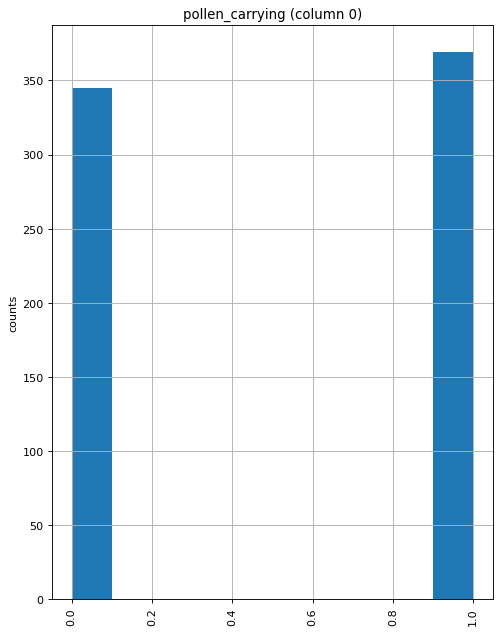

In [67]:
plotPerColumnDistribution(data,2,2)

### Correlations Matrix

In [74]:
def plotCorrelationMatrix(df, graphWidth):
    df = df.dropna('columns') 
    df = df[[col for col in df if df[col].nunique() > 1]] 
    if df.shape[1] < 2:
        print(f'No correlation plots shown: The number of non-NaN or constant columns ({df.shape[1]}) is less than 2')
        return
    corr = df.corr()
    plt.figure(num=None, figsize=(graphWidth, graphWidth), dpi=80, facecolor='w', edgecolor='k')
    corrMat = plt.matshow(corr, fignum = 1)
    plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
    plt.yticks(range(len(corr.columns)), corr.columns)
    plt.gca().xaxis.tick_bottom()
    plt.colorbar(corrMat)
    plt.title(f'Correlation Matrix', fontsize=15)
    plt.show()

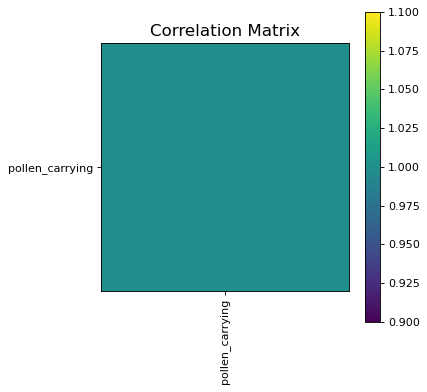

In [83]:
plotCorrelationMatrix(data,5)

### Scatter/Density plot

In [76]:
def plotScatterMatrix(df, plotSize, textSize):
    df = df.select_dtypes(include =[np.number]) 
  
    df = df.dropna('columns')
    df = df[[col for col in df if df[col].nunique() > 1]] 
    columnNames = list(df)
    if len(columnNames) > 10:
        columnNames = columnNames[:10]
    df = df[columnNames]
    ax = pd.plotting.scatter_matrix(df, alpha=0.75, figsize=[plotSize, plotSize], diagonal='kde')
    corrs = df.corr().values
    for i, j in zip(*plt.np.triu_indices_from(ax, k = 1)):
        ax[i, j].annotate('Corr. coef = %.3f' % corrs[i, j], (0.8, 0.2), xycoords='axes fraction', ha='center', va='center', size=textSize)
    plt.suptitle('Scatter and Density Plot')
    plt.show()

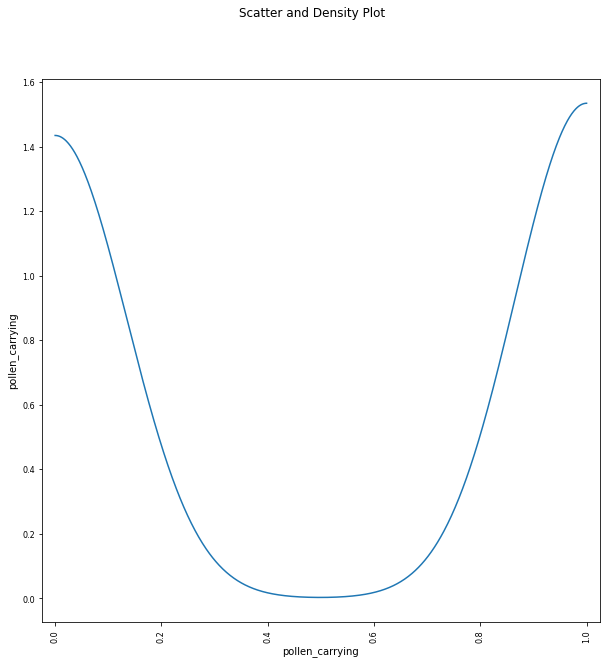

In [80]:
plotScatterMatrix(data,10,10)

## Loading the images

(180, 300)


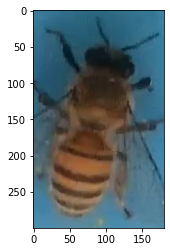

In [23]:
from PIL import Image

img = Image.open(r"C:\Users\KIIT\Documents\LGM-Soc contributions\Honey bee Pollen Detection\Dataset/images/NP4226-45r.jpg")
print(img.size)
plt.imshow(img)

### Image Preprocessing

In [5]:
def preprocess_df(df, image_path):
    df = df.copy()

    df['filename'] = df['filename'].apply(lambda x: image_path / Path(x)).astype(str)

    df['pollen_carrying'] = df['pollen_carrying'].replace({0: "NO POLLEN", 1: "POLLEN"})

    train_df, test_df = train_test_split(df, train_size=0.7, shuffle=True, random_state=1)
    
    return train_df, test_df

In [6]:
train_df, test_df = preprocess_df(data, image_path=r'C:\Users\KIIT\Documents\LGM-Soc contributions\Honey bee Pollen Detection\Dataset\images')

In [7]:
train_df

,filename,pollen_carrying
507,C:\Users\KIIT\Documents\LGM-Soc contributions\...,POLLEN
346,C:\Users\KIIT\Documents\LGM-Soc contributions\...,NO POLLEN
160,C:\Users\KIIT\Documents\LGM-Soc contributions\...,POLLEN
463,C:\Users\KIIT\Documents\LGM-Soc contributions\...,NO POLLEN
432,C:\Users\KIIT\Documents\LGM-Soc contributions\...,POLLEN
...,...,...
144,C:\Users\KIIT\Documents\LGM-Soc contributions\...,POLLEN
645,C:\Users\KIIT\Documents\LGM-Soc contributions\...,NO POLLEN
72,C:\Users\KIIT\Documents\LGM-Soc contributions\...,POLLEN
235,C:\Users\KIIT\Documents\LGM-Soc contributions\...,NO POLLEN


In [39]:
def dataset(file_list,size=(300,180),flattened=False):
    data = []
    for i, file in enumerate(file_list):
        image = io.imread(file)
        image = transform.resize(image, size, mode='constant')
        if flattened:
            image = image.flatten()

        data.append(image)

    labels = [1 if f.split("/")[-1][0] == 'P' else 0 for f in file_list]

    return np.array(data), np.array(labels)

In [46]:
import glob,os
from skimage import io, transform

paths = r"C:\Users\KIIT\Documents\LGM-Soc contributions\Honey bee Pollen Detection\Dataset\images/"
imlist= glob.glob(os.path.join(paths, '*.jpg'))

In [47]:
X,y=dataset(imlist)

In [48]:
print('X: ',X.shape)
print('y: ',y.shape) 

X:  (714, 300, 180, 3)
y:  (714,)


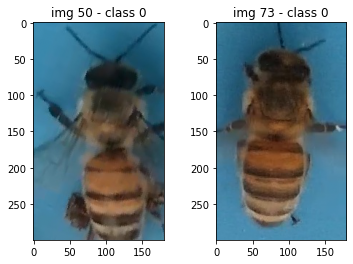

In [54]:
fig, axes = plt.subplots(1,2)
k=50
plt.sca(axes[0])
plt.imshow(X[k])
plt.title('img {} - class {}'.format(k, y[k]))

k=73
plt.sca(axes[1])
plt.imshow(X[k])
plt.title('img {} - class {}'.format(k, y[k]));

### Image Augmentation using ImageDataGenerator

In [8]:
train_generator = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2
)

test_generator = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale=1./255
)

### Visualizations of the training images

In [9]:
train_images = train_generator.flow_from_dataframe(
    dataframe=train_df,
    x_col='filename',
    y_col='pollen_carrying',
    target_size=(224, 224),
    color_mode='rgb',
    class_mode='binary',
    batch_size=32,
    shuffle=True,
    seed=42,
    subset='training'
)

Found 400 validated image filenames belonging to 2 classes.


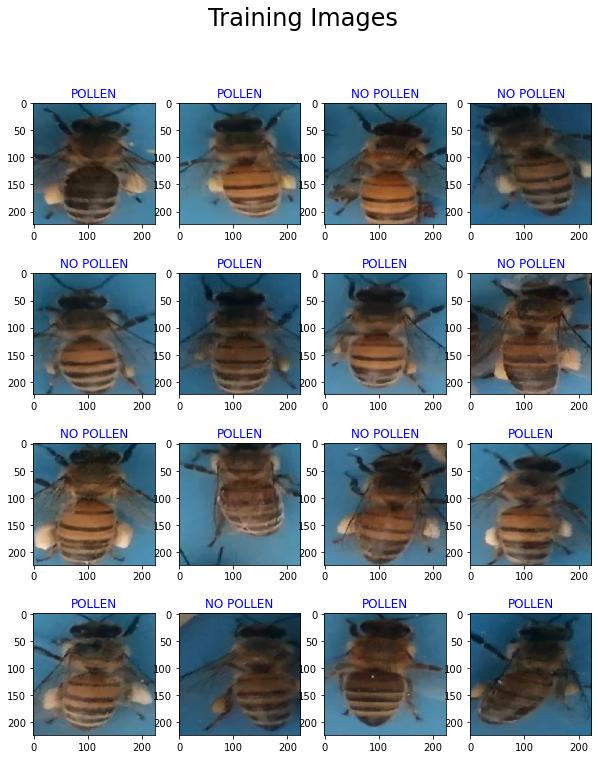

In [61]:
plt.figure(figsize=(10, 12))

for i in range(16):
    plt.subplot(4, 4, i + 1)
    plt.imshow(train_images[0][0][i])
    plt.title(
        "NO POLLEN" if data['pollen_carrying'][i] == 0 else "POLLEN",
        color='blue')
    
    plt.suptitle("Training Images", size=24)
plt.show()

### Greyscale visualization of the training images

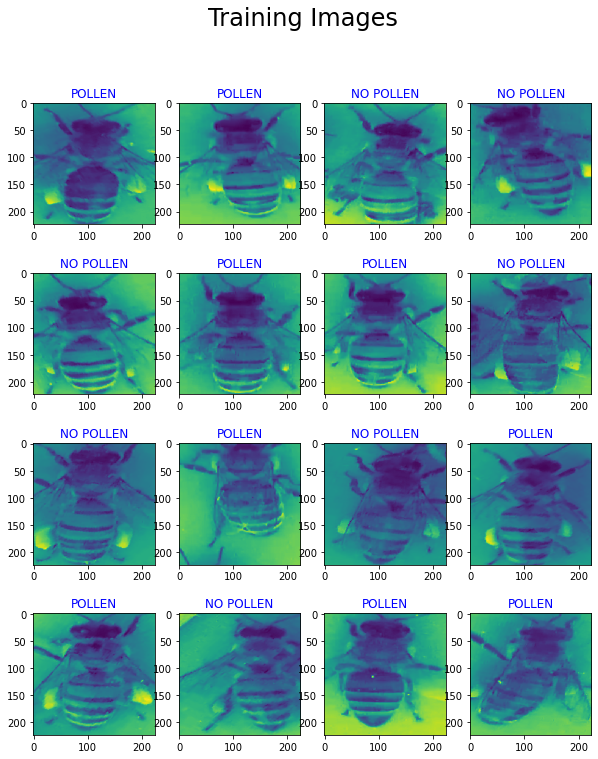

In [60]:
import cv2

plt.figure(figsize=(10, 12))

for i in range(16):
    plt.subplot(4, 4, i + 1)
    plt.imshow(cv2.cvtColor(train_images[0][0][i], cv2.COLOR_BGR2GRAY))
    plt.title(
        "NO POLLEN" if data['pollen_carrying'][i] == 0 else "POLLEN",
        color='blue')
    
    plt.suptitle("Training Images", size=24)
plt.show()


### Visualizations of the validation images

In [10]:
val_images = train_generator.flow_from_dataframe(
    dataframe=train_df,
    x_col='filename',
    y_col='pollen_carrying',
    target_size=(224, 224),
    color_mode='rgb',
    class_mode='binary',
    batch_size=32,
    shuffle=True,
    seed=42,
    subset='validation'
)

Found 99 validated image filenames belonging to 2 classes.


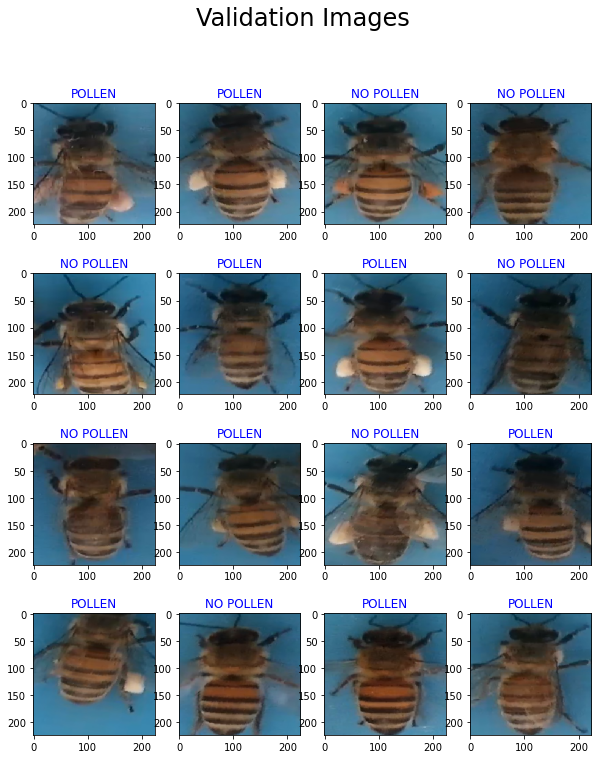

In [29]:
plt.figure(figsize=(10, 12))

for i in range(16):
    plt.subplot(4, 4, i + 1)
    plt.imshow(val_images[0][0][i])
    plt.title(
        "NO POLLEN" if data['pollen_carrying'][i] == 0 else "POLLEN",
        color='blue')
    
    plt.suptitle("Validation Images", size=24)
plt.show()

### Greyscale visualization of the validation images

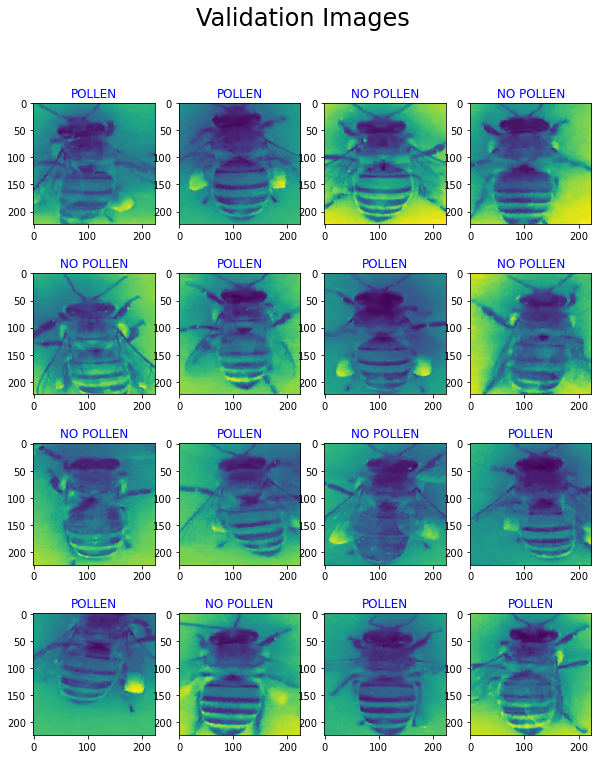

In [62]:
plt.figure(figsize=(10, 12))

for i in range(16):
    plt.subplot(4, 4, i + 1)
    plt.imshow(cv2.cvtColor(val_images[0][0][i], cv2.COLOR_BGR2GRAY))
    plt.title(
        "NO POLLEN" if data['pollen_carrying'][i] == 0 else "POLLEN",
        color='blue')
    
    plt.suptitle("Validation Images", size=24)
plt.show()

### Visualizations of the testing images

In [11]:
test_images = test_generator.flow_from_dataframe(
    dataframe=test_df,
    x_col='filename',
    y_col='pollen_carrying',
    target_size=(224, 224),
    color_mode='rgb',
    class_mode='binary',
    batch_size=32,
    shuffle=False
)

Found 215 validated image filenames belonging to 2 classes.


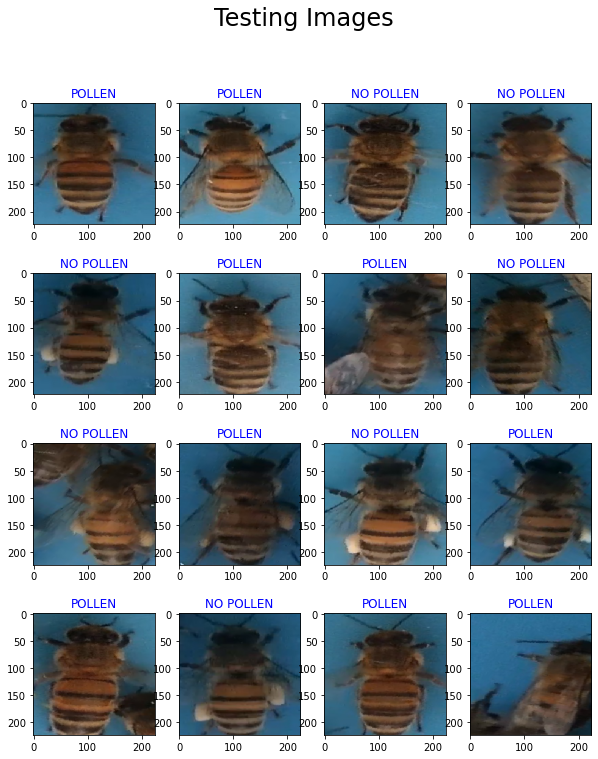

In [63]:
plt.figure(figsize=(10, 12))

for i in range(16):
    plt.subplot(4, 4, i + 1)
    plt.imshow(test_images[0][0][i])
    plt.title(
        "NO POLLEN" if data['pollen_carrying'][i] == 0 else "POLLEN",
        color='blue')
    
    plt.suptitle("Testing Images", size=24)
plt.show()

### Greyscale visualization of the testing images

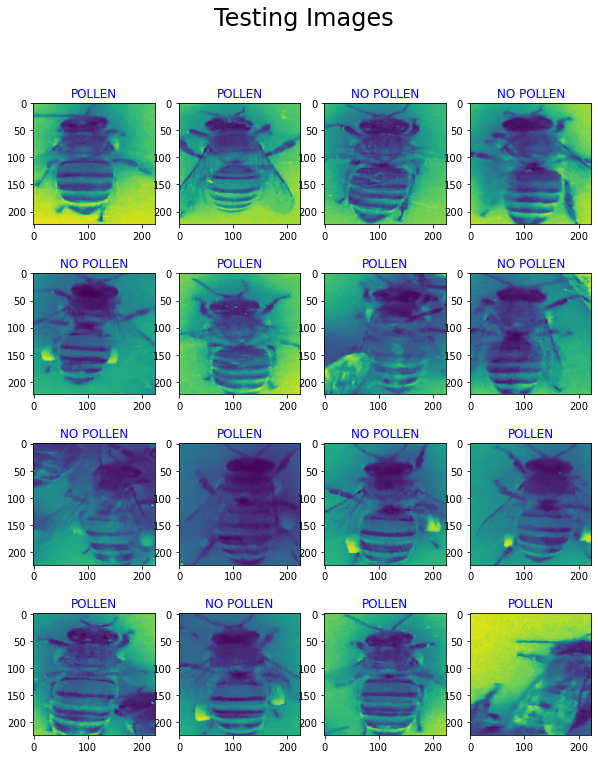

In [64]:
plt.figure(figsize=(10, 12))

for i in range(16):
    plt.subplot(4, 4, i + 1)
    plt.imshow(cv2.cvtColor(test_images[0][0][i], cv2.COLOR_BGR2GRAY))
    plt.title(
        "NO POLLEN" if data['pollen_carrying'][i] == 0 else "POLLEN",
        color='blue')
    
    plt.suptitle("Testing Images", size=24)
plt.show()

## Building the CNN model

In [12]:
inputs = tf.keras.Input(shape=(224, 224, 3))
x = tf.keras.layers.Conv2D(filters=16, kernel_size=(3, 3), activation='relu')(inputs)
x = tf.keras.layers.MaxPool2D()(x)
x = tf.keras.layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu')(x)
x = tf.keras.layers.MaxPool2D()(x)
x = tf.keras.layers.GlobalAveragePooling2D()(x)
x = tf.keras.layers.Dense(128, activation='relu')(x)
x = tf.keras.layers.Dense(128, activation='relu')(x)
outputs = tf.keras.layers.Dense(1, activation='sigmoid')(x)

model = tf.keras.Model(inputs=inputs, outputs=outputs)

model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

In [13]:
history = model.fit(
    train_images,
    validation_data=val_images,
    epochs=100,
    callbacks=[
        tf.keras.callbacks.EarlyStopping(
            monitor='val_loss',
            patience=5,
            restore_best_weights=True
        )
    ]
)

Epoch 1/100
13/13 [==============================] - 8s 608ms/step - loss: 0.6937 - accuracy: 0.5241 - val_loss: 0.6970 - val_accuracy: 0.4545
Epoch 2/100
13/13 [==============================] - 8s 583ms/step - loss: 0.6922 - accuracy: 0.5171 - val_loss: 0.6993 - val_accuracy: 0.4545
Epoch 3/100
13/13 [==============================] - 7s 568ms/step - loss: 0.6877 - accuracy: 0.5521 - val_loss: 0.6975 - val_accuracy: 0.4545
Epoch 4/100
13/13 [==============================] - 7s 559ms/step - loss: 0.6954 - accuracy: 0.4888 - val_loss: 0.6938 - val_accuracy: 0.4545
Epoch 5/100
13/13 [==============================] - 7s 563ms/step - loss: 0.6893 - accuracy: 0.5654 - val_loss: 0.6979 - val_accuracy: 0.4545
Epoch 6/100
13/13 [==============================] - 7s 565ms/step - loss: 0.6912 - accuracy: 0.5182 - val_loss: 0.6940 - val_accuracy: 0.4545
Epoch 7/100
13/13 [==============================] - 7s 561ms/step - loss: 0.6897 - accuracy: 0.5161 - val_loss: 0.6947 - val_accuracy: 0.4545

### Classification report

Accuracy: 85.58%


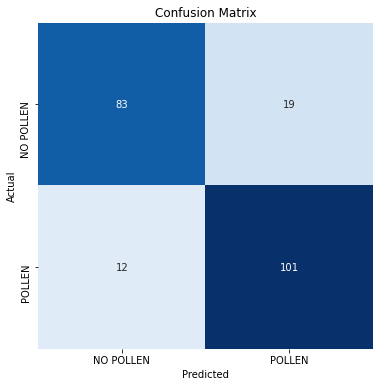

Classification Report:
----------------------
               precision    recall  f1-score   support

   NO POLLEN       0.87      0.81      0.84       102
      POLLEN       0.84      0.89      0.87       113

    accuracy                           0.86       215
   macro avg       0.86      0.85      0.85       215
weighted avg       0.86      0.86      0.86       215



In [14]:
results = model.evaluate(test_images, verbose=0)
print("Accuracy: {:.2f}%".format(results[1] * 100))

predictions = np.squeeze(model.predict(test_images) >= 0.5).astype(np.int)

cm = confusion_matrix(test_images.labels, predictions, labels=[0, 1])
clr = classification_report(test_images.labels, predictions, labels=[0, 1], target_names=["NO POLLEN", "POLLEN"])

plt.figure(figsize=(6, 6))
sns.heatmap(cm, annot=True, fmt='g', vmin=0, cmap='Blues', cbar=False)
plt.xticks(ticks=[0.5, 1.5], labels=["NO POLLEN", "POLLEN"])
plt.yticks(ticks=[0.5, 1.5], labels=["NO POLLEN", "POLLEN"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

print("Classification Report:\n----------------------\n", clr)

In [85]:
model.save(r'C:\Users\KIIT\Documents\LGM-Soc contributions\Honey bee Pollen Detection\Model/CNN model.model')

INFO:tensorflow:Assets written to: C:\Users\KIIT\Documents\LGM-Soc contributions\Honey bee Pollen Detection\Model/CNN model.model\assets


**Validation Accuracy achieved - 86.00%**

## Making predictions on the testing Images

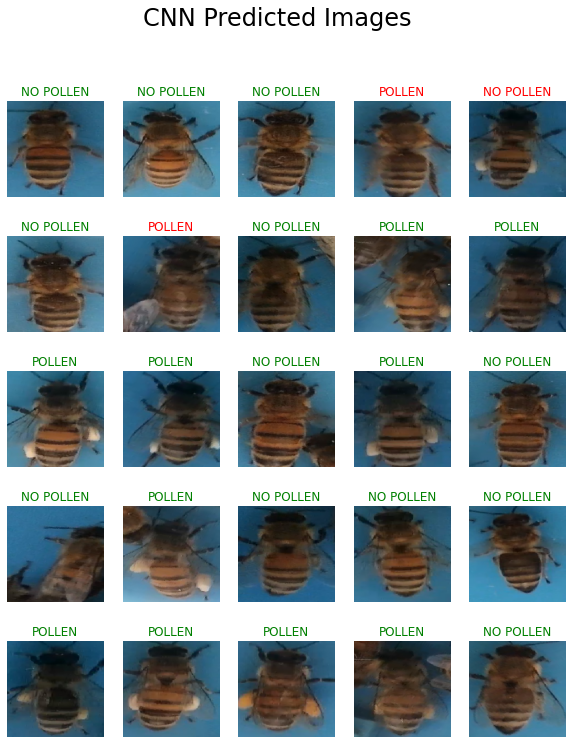

In [65]:
plt.figure(figsize=(10, 12))

for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.imshow(test_images[0][0][i])
    plt.title(
        "NO POLLEN" if predictions[i] == 0 else "POLLEN",
        color='green' if predictions[i] == test_images.labels[i] else 'red'
    )
    plt.axis('off')

plt.suptitle("CNN Predicted Images", size=24)
plt.show()